# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

--------------------------------------------------------------------------------------
Chosen Dataset: World Happiness dataset

Label to Predict: Happiness

Type of Problem: Supervised learning
Type of Learning: Regression (since Happiness is typically a continuous score or numeric value)

Features I Could Use: 'country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'

Importance of the Problem:
    
    Understanding the relationship between freedom and happiness can be crucial for various applications. Companies or governments can use this model to:
    Policy Making: Design policies that enhance freedom, potentially leading to higher happiness scores among citizens.
    Human Resources: Create work environments that maximize employee satisfaction and well-being.
    Marketing: Develop targeted campaigns that resonate with values related to freedom and happiness.
    Global Comparisons: Offer insights into how freedom impacts happiness across different regions or countries, potentially guiding international aid and development strategies.

Overall, predicting happiness based on freedom can help in making data-driven decisions that improve quality of life and societal well-being.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
print(df.describe())

              year  Life Ladder  Log GDP per capita  Social support  \
count  1562.000000  1562.000000         1535.000000     1549.000000   
mean   2011.820743     5.433676            9.220822        0.810669   
std       3.419787     1.121017            1.184035        0.119370   
min    2005.000000     2.661718            6.377396        0.290184   
25%    2009.000000     4.606351            8.310665        0.748304   
50%    2012.000000     5.332600            9.398610        0.833047   
75%    2015.000000     6.271025           10.190634        0.904329   
max    2017.000000     8.018934           11.770276        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1553.000000                   1533.000000   
mean                          62.249887                      0.728975   
std                            7.960671                      0.145408   
min                           37.766476                      0.25753

In [5]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = df[cols_to_include].rename(renaming, axis=1)
df = df[df.year.isin(range(2015,2018))]
df = df.dropna() # remove missing values
df.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
7,Afghanistan,2015,3.982855,0.553553,0.339276,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638
8,Afghanistan,2016,4.220169,0.564953,0.348332,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246
9,Afghanistan,2017,2.661718,0.496349,0.371326,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393
17,Albania,2015,4.606651,0.688370,0.350427,9.303031,0.639356,68.691956,0.703851,-0.086883,0.884793
18,Albania,2016,4.511101,0.675244,0.321706,9.337774,0.638411,68.871811,0.729819,-0.023276,0.901071


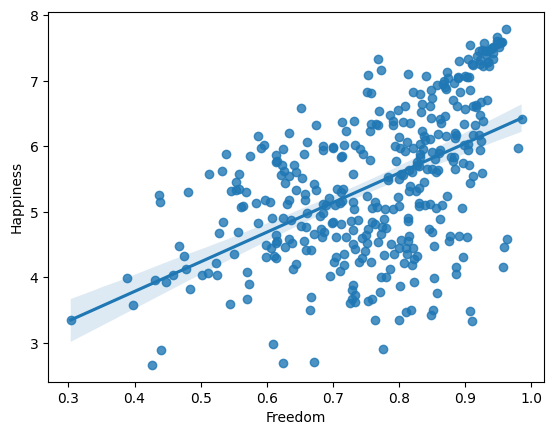

In [6]:
sns.regplot(x='Freedom', y='Happiness', data=df);

Freedom       1.000000
Positive      0.606097
Happiness     0.520864
Support       0.382484
LogGDP        0.345586
Life          0.328149
Generosity    0.307911
year          0.110651
Negative     -0.327412
Corruption   -0.490568
Name: Freedom, dtype: float64


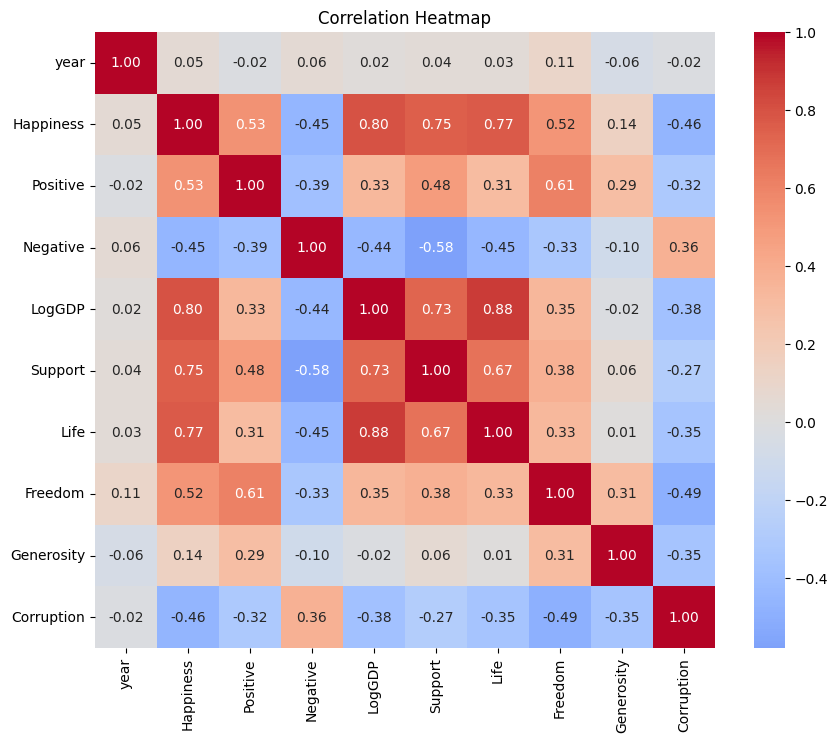

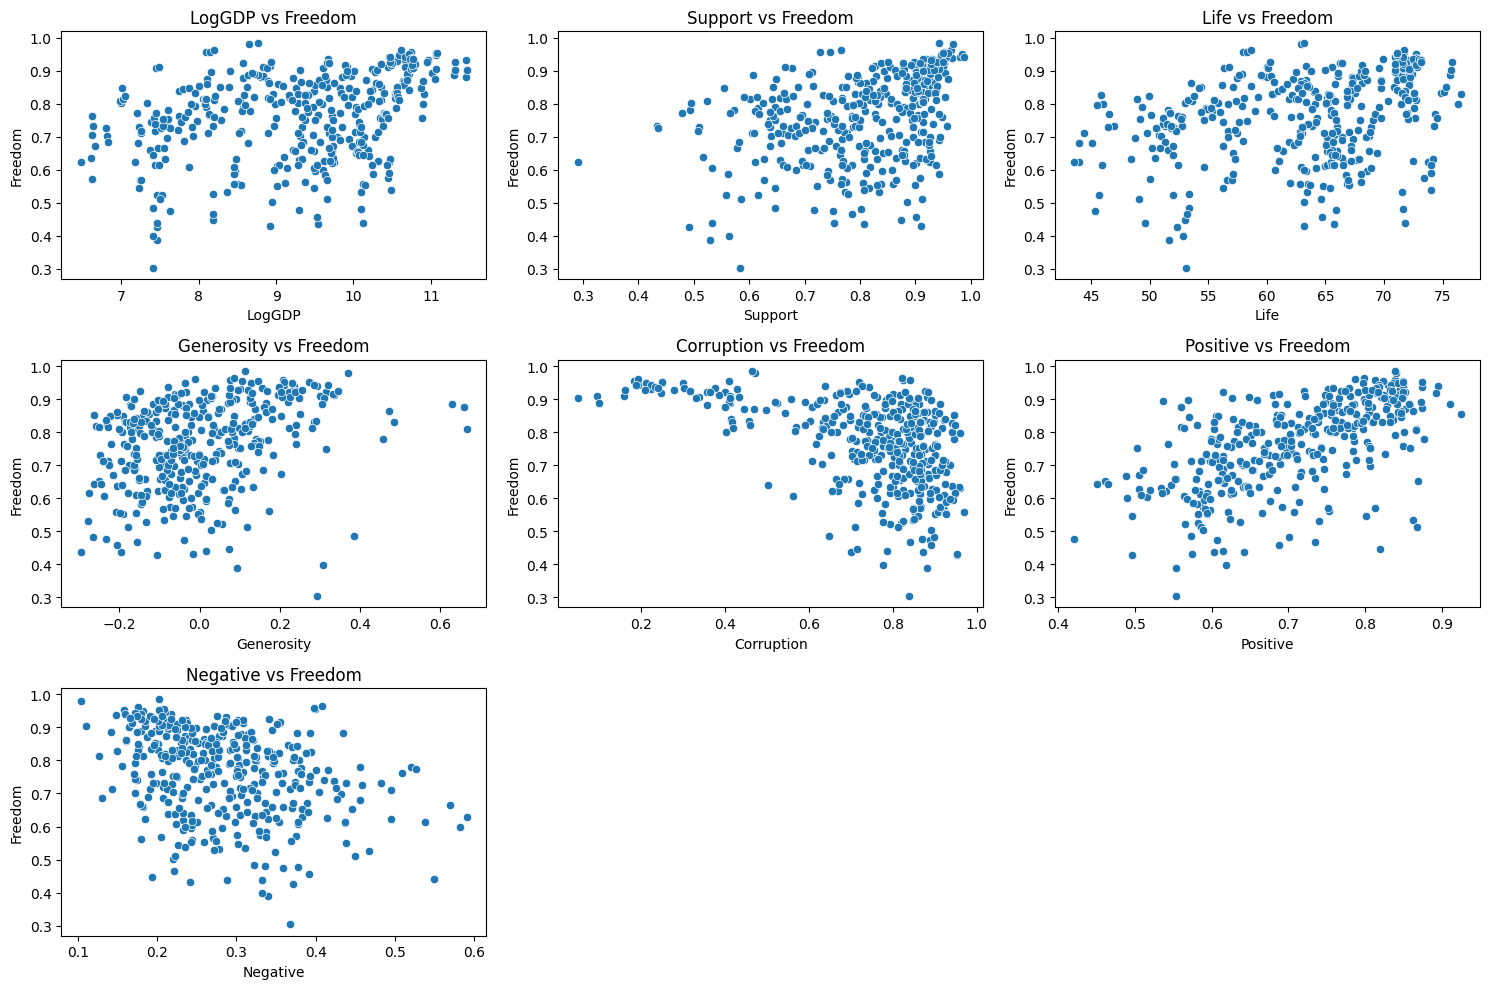

In [49]:
correlation_matrix = df.corr()

# Print correlation values
print(correlation_matrix['Freedom'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots to visualize relationships
features = ['LogGDP', 'Support', 'Life', 'Generosity', 'Corruption',  'Positive', 'Negative']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['Freedom'])
    plt.title(f'{feature} vs Freedom')
    plt.xlabel(feature)
    plt.ylabel('Freedom')

plt.tight_layout()
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

--------------------------------------------------------------------------------------
1. Feature List
    After inspecting the data, the features to keep and potentially remove are:
    
    Features to Keep:
    
    'Log GDP per capita', 
    'Social support', 
    'Healthy life expectancy at birth', 
    'Freedom to make life choices', 
    'Generosity', 
    'Perceptions of corruption', 
    'Positive affect'

   Features to Remove:
    
    'country' (unless needed for specific analysis), 
    'year' (unless you're analyzing temporal trends)

3. Data Preparation Techniques
    To prepare the data for modeling, you will use the following techniques:
    
    Handling Missing Values: Impute or remove missing values based on their impact on the dataset.
    Feature Scaling: Normalize or standardize features like 'Log GDP per capita' and 'Healthy life expectancy at birth' to ensure they contribute equally to the model.
    Feature Selection: Use techniques such as correlation analysis to select the most relevant features for predicting happiness.
    Encoding Categorical Variables: If you decide to use 'country', encode it using one-hot encoding or similar techniques.
    Splitting the Data: Divide the dataset into training and testing sets to evaluate model performance.
    Data Augmentation: Apply data augmentation techniques if needed to improve the model's generalization.

4. Model Selection
    Initial Model: Start with a simple linear regression model to establish a baseline performance.
    Advanced Models: Explore more complex models such as Decision Trees, Random Forests, Gradient Boosting Machines, or even neural networks, depending on the performance of the initial model.
   
5. Model Building, Validation, and Selection
    Training: Train the chosen models using the training data.
    Validation: Use cross-validation techniques to assess model performance and prevent overfitting. Evaluate models based on metrics like Mean Squared Error (MSE) or R-squared.
    Hyperparameter Tuning: Optimize model parameters using techniques like grid search or random search.
    Performance Analysis: Compare model performance on the test set to ensure that it generalizes well to new data.
    Improvement: Iterate on the model by adjusting features, trying different algorithms, or employing advanced techniques like ensemble methods to improve accuracy.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [51]:
X = df['Freedom'].to_frame()
y = df['Happiness']

print(X)
print(y)

       Freedom
7     0.388928
8     0.522566
9     0.427011
17    0.703851
18    0.729819
...        ...
1548  0.811575
1549  0.823169
1559  0.667193
1560  0.732971
1561  0.752826

[380 rows x 1 columns]
7       3.982855
8       4.220169
9       2.661718
17      4.606651
18      4.511101
          ...   
1548    4.347544
1549    3.932777
1559    3.703191
1560    3.735400
1561    3.638300
Name: Happiness, Length: 380, dtype: float64


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

In [53]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [54]:
# Weight_1 (weight of feature Freedom)
print('Model Summary\n\nWeight_1 =  ', model.coef_[0], '[ weight of feature Freedom ]')
# alpha
print('Alpha = ', model.intercept_, '[ intercept ]')

Model Summary

Weight_1 =   4.693483673888185 [ weight of feature Freedom ]
Alpha =  1.8130486427085382 [ intercept ]


We can translate the output above the following way: the training phase has identified that the best straight-line model fitting Happiness to LogGDP is approximately:

Happiness=4.69∗LogGDP+1.81
 


In [55]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   1.01
 R^2 =   0.19


This means that, on average, our predictions are off by 1.01 units.  Since the Happiness feature in our data set ranges between about 2.5 and 8, our predictions are not too far off.

The R^2 value of 0.19 implies that 19% of the variation in the Happiness feature was explained with the model by variation in LogGDP.

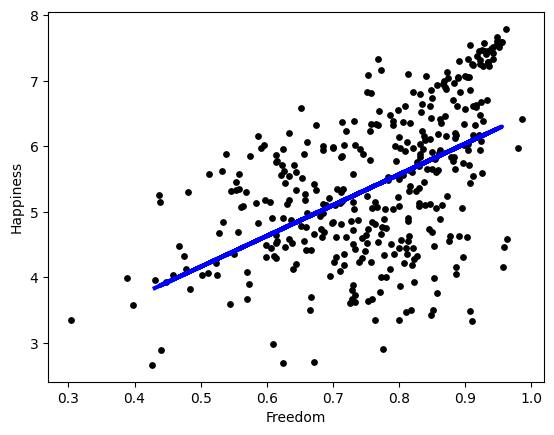

In [56]:
plt.scatter(X, y,  color='black',s=15);

plt.plot(X_test, prediction, color='blue', linewidth=3);

plt.xlabel('Freedom');
plt.ylabel('Happiness');

From the plot, we can observe a strong positive correlation between these two features. Perhaps by including more features within the model, a better estimate of happiness from freedom can be obtained. Futher analysis of happiness' correlation, such as through multiple linear regression, might be needed to get the most accurate results.